# Load Cleaned Data

In [1]:
import pandas as pd
df = pd.read_csv('../data/cleaned_telco.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,PhoneService_Flag,InternetService_Flag,OnlineSecurity_Flag,StreamingTV_Flag,ServicesUsed_Simple,TotalServicesUsed,PlanTier
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,29.85,29.85,0,0,0,0,0,0,1,Free
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,56.95,1889.50,0,1,0,1,0,2,3,Basic
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,53.85,108.15,1,1,0,1,0,2,3,Free
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,42.30,1840.75,0,0,0,1,0,1,3,Basic
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,70.70,151.65,1,1,1,0,0,2,1,Free


# Import Prediction Function

In [2]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

from predict_churn import train_logistic_model

# Train Model and Predict Churn Probability

In [3]:
features = ['tenure', 'MonthlyCharges', 'TotalServicesUsed', 'Contract']
df_with_preds, model = train_logistic_model(df, features)
df_with_preds[features + ['Churn_Prob']].head()

,tenure,MonthlyCharges,TotalServicesUsed,Contract,Churn_Prob
0,1,29.85,1,0,0.310901
1,34,56.95,3,1,0.112112
2,2,53.85,3,0,0.406346
3,45,42.30,3,1,0.049335
4,2,70.70,1,0,0.682328


# Visualize Predicted Churn Probablities

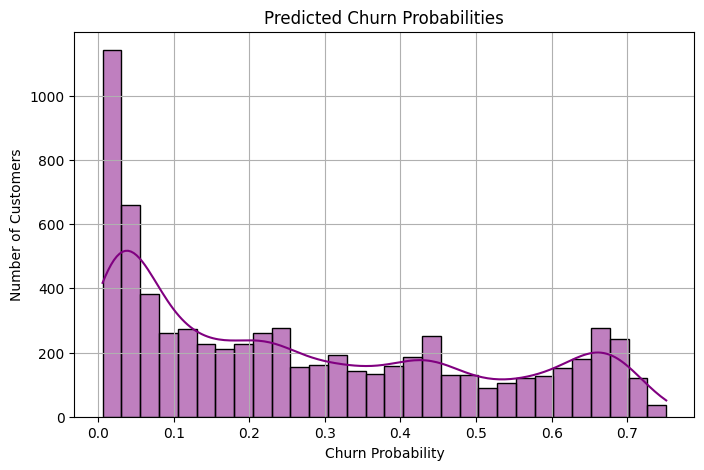

In [9]:
# Exploring the distribution of churn probability scores across all customers

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of predicted churn probabilities
plt.figure(figsize=(8, 5))
sns.histplot(df_with_preds['Churn_Prob'], bins=30, kde=True, color='purple')
plt.title("Predicted Churn Probabilities")
plt.xlabel("Churn Probability")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

# Churn Probablity by Contract Type

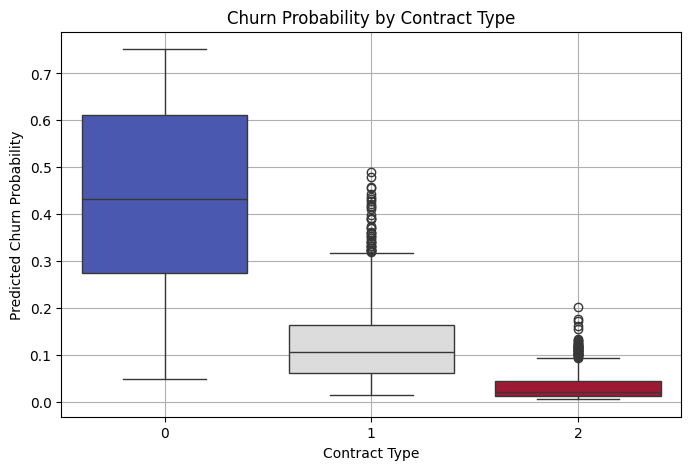

In [10]:
# Analyze how churn likelihood varies based on contract type

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_with_preds, x='Contract', y='Churn_Prob', hue='Contract', palette='coolwarm', legend=False)
plt.title("Churn Probability by Contract Type")
plt.ylabel("Predicted Churn Probability")
plt.xlabel("Contract Type")
plt.grid(True)
plt.show()

# Top 10 At-Risk Customers

In [12]:
# Top 10 customers with highest churn probability
top_at_risk = df_with_preds.sort_values(by='Churn_Prob', ascending=False).head(10)

# Display relevant info
top_at_risk[['tenure', 'MonthlyCharges', 'TotalServicesUsed', 'Contract', 'Churn_Prob']]

,tenure,MonthlyCharges,TotalServicesUsed,Contract,Churn_Prob
2181,1,91.30,3,0,0.751579
4935,1,90.85,3,0,0.748296
2644,1,90.75,3,0,0.747563
4195,1,90.60,3,0,0.746460
966,1,90.55,3,0,0.746091
3441,1,90.55,3,0,0.746091
1894,3,92.00,3,0,0.745785
5287,1,90.10,3,0,0.742760
2797,2,97.10,4,0,0.742637
842,1,89.90,3,0,0.741270
